In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import dicom
import scipy.misc
import numpy as np

import blosc

%matplotlib inline

In [57]:
def plot_ct_scan(scan):
    f, plots = plt.subplots(int(scan.shape[0] / 20) + 1, 4, figsize=(25, 25))
    for i in range(0, scan.shape[0], 5):
        plots[int(i / 20), int((i % 20) / 5)].axis('off')
        plots[int(i / 20), int((i % 20) / 5)].imshow(scan[i], cmap=plt.cm.bone) 
        
def plot_3d(image, threshold=0):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    verts, faces, _, _ = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()
    
def read_blp(file_name, shape):
    with open(file_name, 'rb') as fd:
        bytes_array = fd.read()
        unpacked = blosc.decompress(bytes_array)
    return np.frombuffer(unpacked, dtype=np.uint8).reshape((shape))

In [95]:
shape = [290,181,262]
scan = read_blp('luna/vids/1.3.6.1.4.1.14519.5.2.1.6279.6001.295298571102631191572192562523.blp', shape)

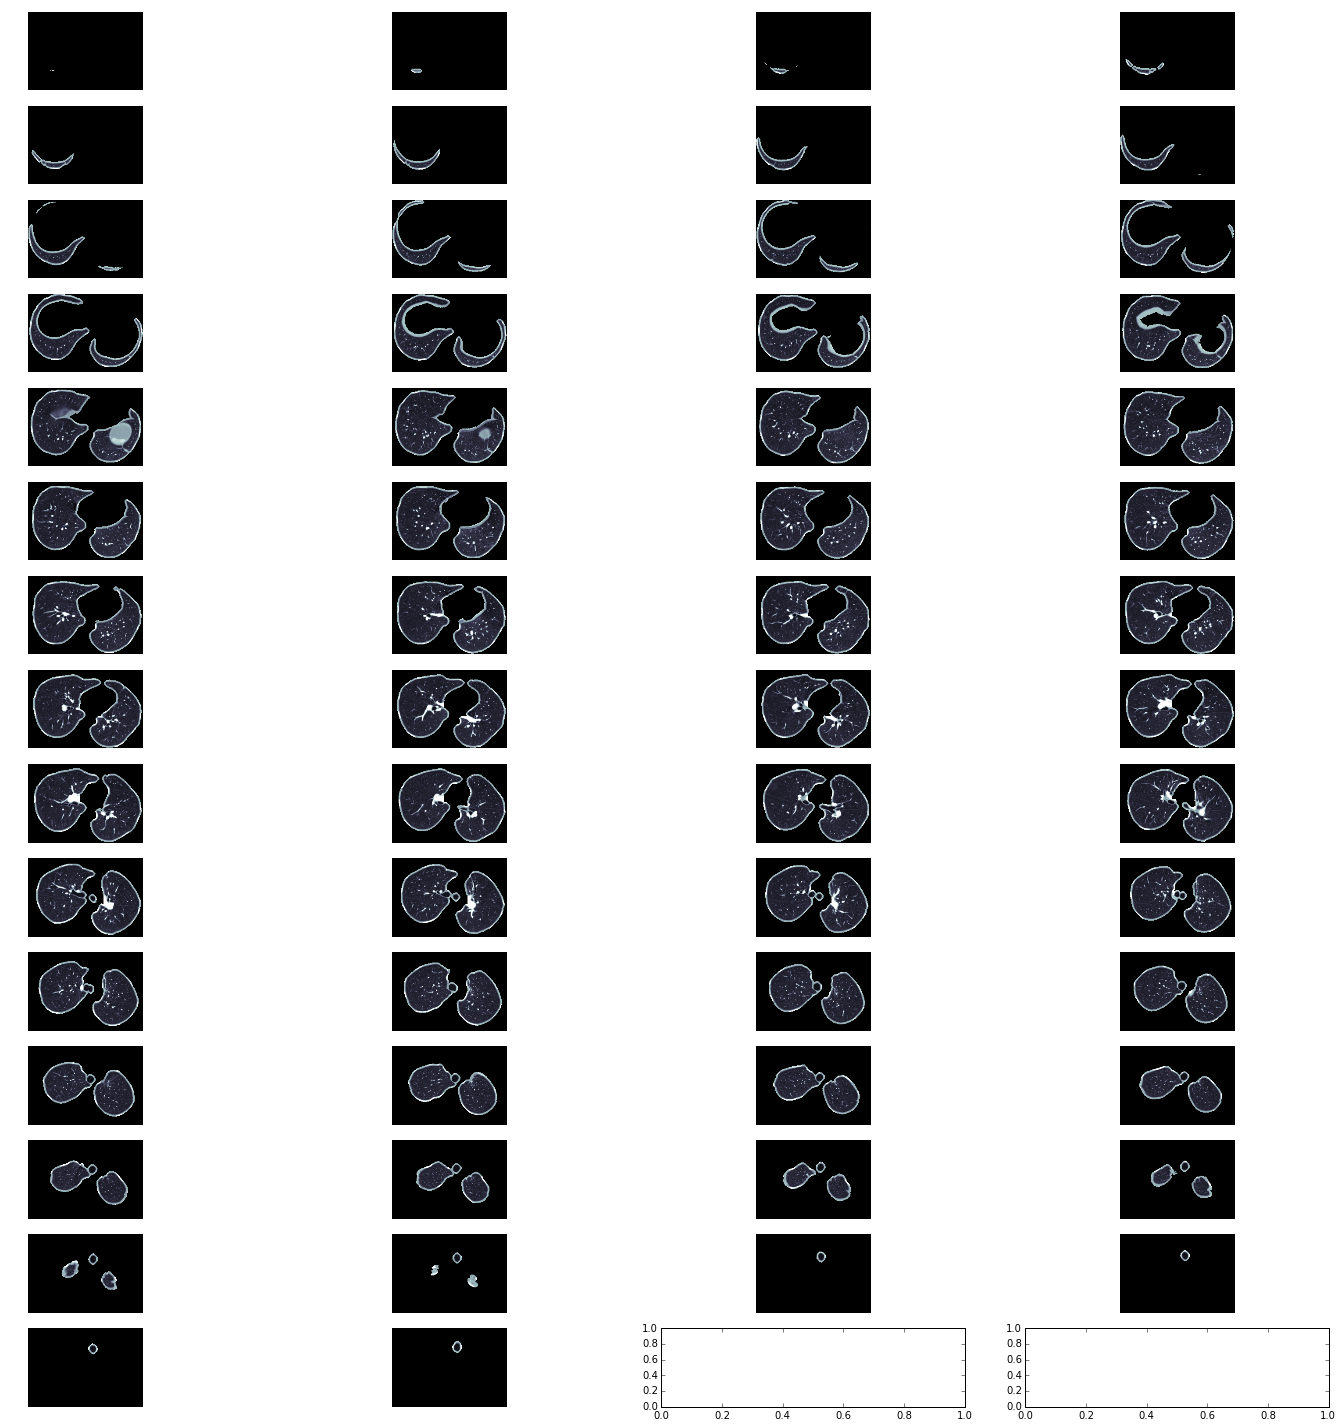

In [96]:
plot_ct_scan(scan)

In [99]:
shape = [286,173,254]
scan = read_blp('luna/test/1.3.6.1.4.1.14519.5.2.1.6279.6001.295298571102631191572192562523.blp', shape)

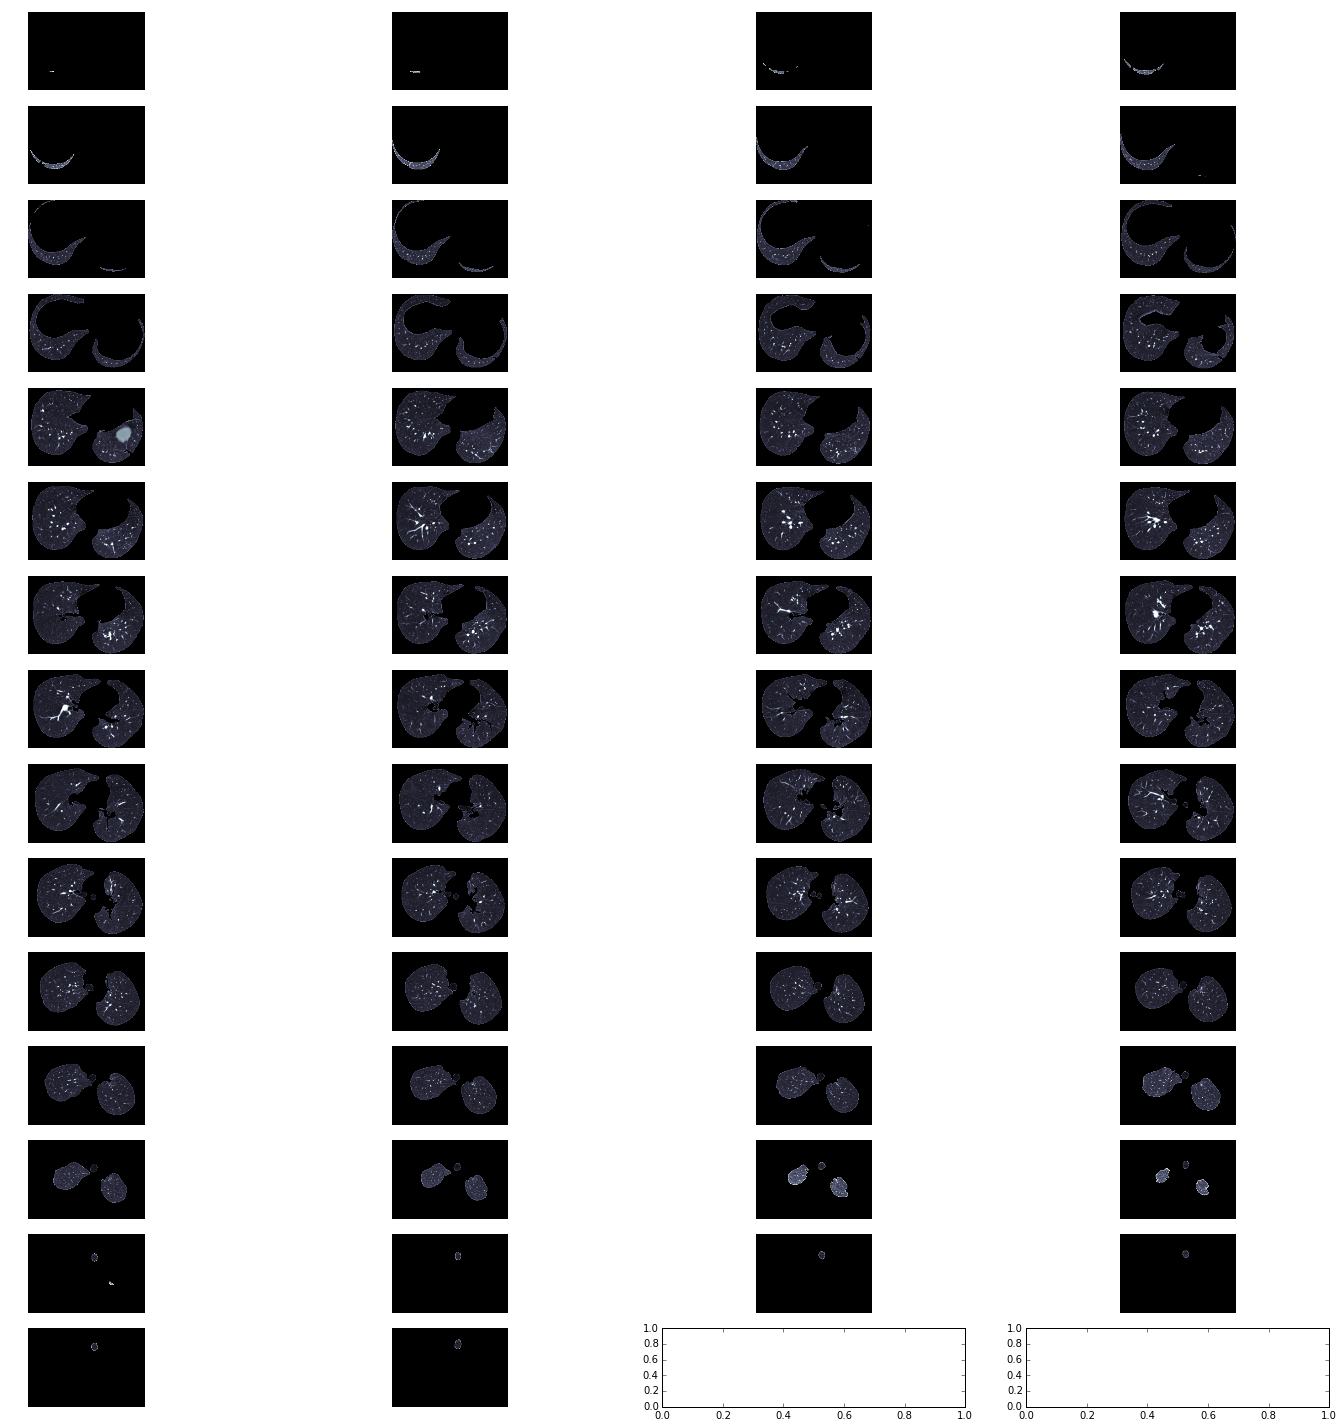

In [100]:
plot_ct_scan(scan)

In [97]:
shape = [304,173,271]
scan = read_blp('dsb/vids/00cba091fa4ad62cc3200a657aeb957e.blp', shape)

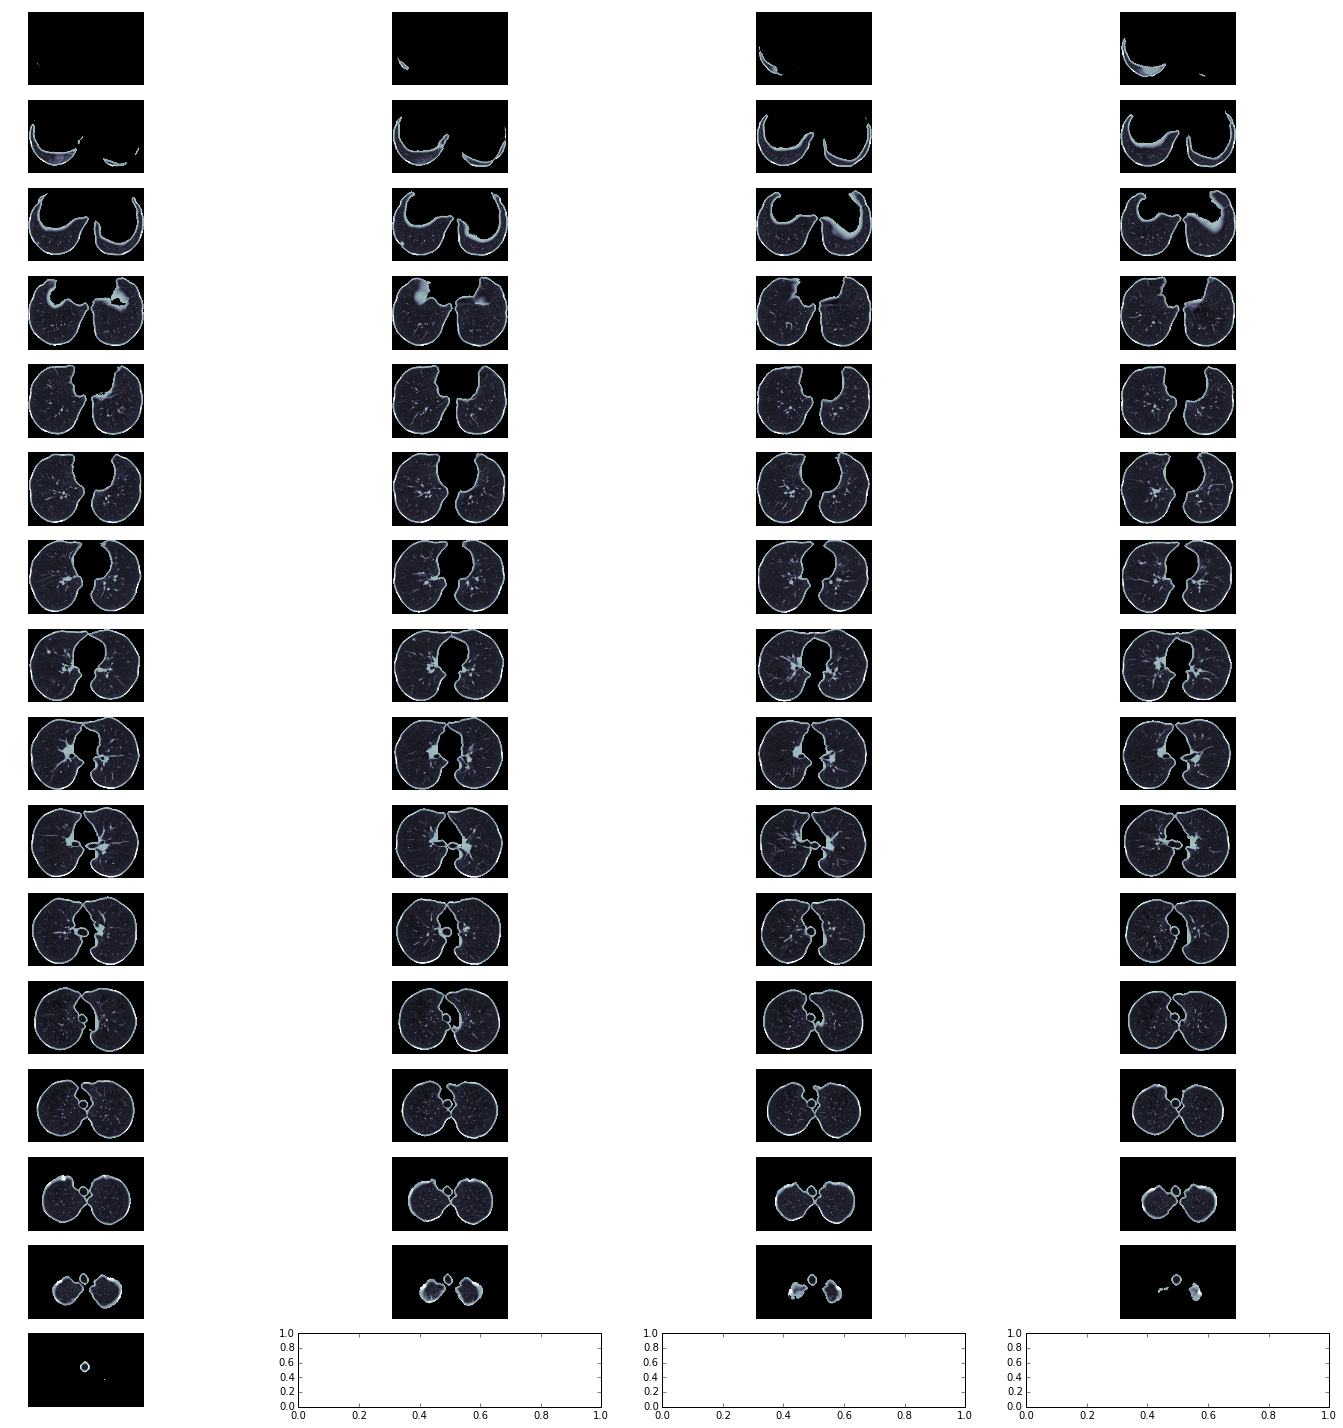

In [98]:
plot_ct_scan(scan)

In [93]:
shape = [300,165,263]
scan = read_blp('dsb/test/00cba091fa4ad62cc3200a657aeb957e.blp', shape)

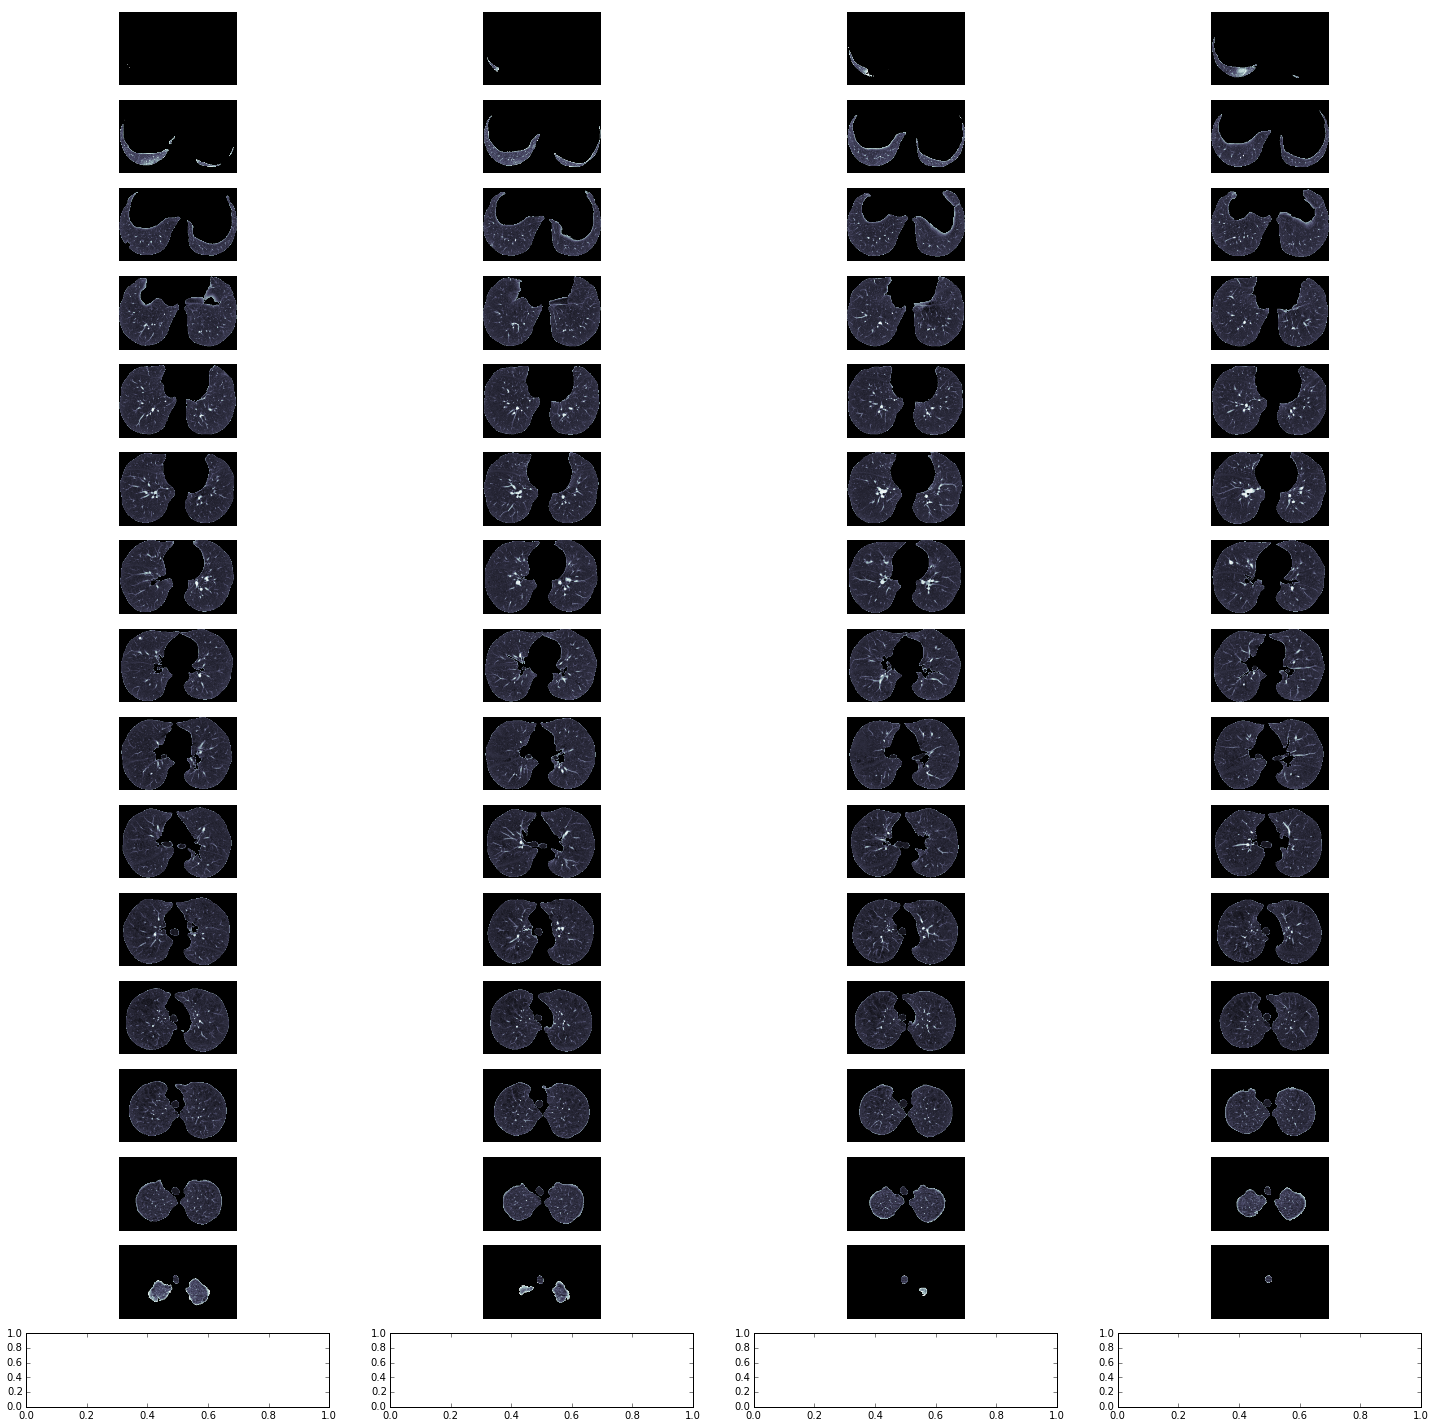

In [94]:
plot_ct_scan(scan)